<a href="https://colab.research.google.com/github/Adithyan-mp/deep_learning/blob/main/deep_s7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training with GD...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with SGD...
Training with Mini_batch_SGD...
Training with Adagrad...
Training with Adadelta...
Training with RMSprop...


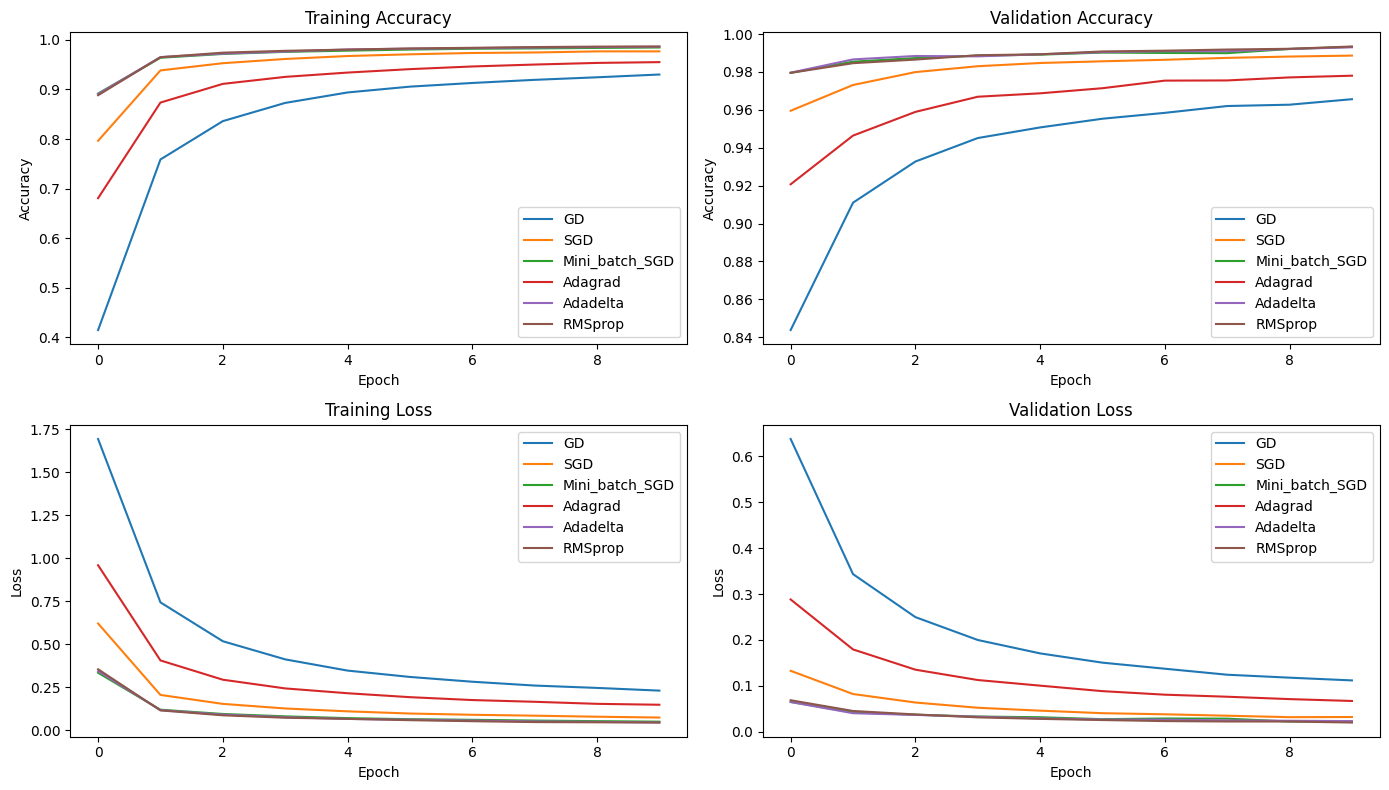

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define a CNN model
def create_model(optimizer):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Optimizers to compare
optimizers = {
    'GD': SGD(learning_rate=0.01, momentum=0.0),
    'SGD': SGD(learning_rate=0.01, momentum=0.9),
    'Mini_batch_SGD': SGD(learning_rate=0.01, momentum=0.9),
    'Adagrad': Adagrad(learning_rate=0.01),
    'Adadelta': Adadelta(learning_rate=1.0),
    'RMSprop': RMSprop(learning_rate=0.001)
}

# Train and store history
history_dict = {}
for name, optimizer in optimizers.items():
    print(f"Training with {name}...")
    model = create_model(optimizer)
    batch_size = 32 if name == 'Mini_batch_SGD' else 128
    history = model.fit(x_train, y_train,
                        epochs=10,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test),
                        verbose=0)
    history_dict[name] = history.history

# Plot training and validation accuracy and loss
plt.figure(figsize=(14, 8))

# Training Accuracy
plt.subplot(2, 2, 1)
for name in history_dict:
    plt.plot(history_dict[name]['accuracy'], label=name)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Validation Accuracy
plt.subplot(2, 2, 2)
for name in history_dict:
    plt.plot(history_dict[name]['val_accuracy'], label=name)
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Training Loss
plt.subplot(2, 2, 3)
for name in history_dict:
    plt.plot(history_dict[name]['loss'], label=name)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Validation Loss
plt.subplot(2, 2, 4)
for name in history_dict:
    plt.plot(history_dict[name]['val_loss'], label=name)
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
